In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
df = pd.read_csv('../Datasets/Kaggle sber bank/train.csv')

In [16]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [39]:
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [30]:
df.iloc[:5,:20]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7


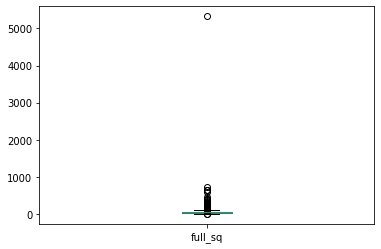

In [41]:
df.full_sq.plot(kind = 'box');

In [45]:
#finding all the missing cols
df.columns[df.isnull().any()]

Index(['life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room',
       'kitch_sq', 'state', 'preschool_quota', 'school_quota',
       'hospital_beds_raion', 'raion_build_count_with_material_info',
       'build_count_block', 'build_count_wood', 'build_count_frame',
       'build_count_brick', 'build_count_monolith', 'build_count_panel',
       'build_count_foam', 'build_count_slag', 'build_count_mix',
       'raion_build_count_with_builddate_info', 'build_count_before_1920',
       'build_count_1921-1945', 'build_count_1946-1970',
       'build_count_1971-1995', 'build_count_after_1995', 'metro_min_walk',
       'metro_km_walk', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'ID_railroad_station_walk',
       'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg',
       'cafe_avg_price_500', 'cafe_sum_1000_min_price_avg',
       'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000',
       'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg',


In [54]:
df.fillna(df.mean(), inplace=True)

In [56]:
df.life_sq.isnull().any()

False

In [61]:
df.loc[:, df.dtypes == object]

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,2011-08-20,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,2011-08-23,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,2011-08-27,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,2011-09-01,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,2011-09-05,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,2015-06-30,Investment,Otradnoe,no,no,yes,no,yes,no,no,no,no,no,no,no,good
30467,2015-06-30,Investment,Tverskoe,yes,no,no,no,yes,yes,no,no,yes,no,no,no,poor
30468,2015-06-30,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
30469,2015-06-30,Investment,Obruchevskoe,no,no,no,no,yes,no,no,no,no,no,no,no,satisfactory


In [62]:
df['culture_objects_top_25'] = df['culture_objects_top_25'].map({'yes': 1, 'no': 0})

In [67]:
df["incineration_raion"] = df['incineration_raion'].map({'yes': 1, 'no': 0})
df["thermal_power_plant_raion"] = df['thermal_power_plant_raion'].map({'yes': 1, 'no': 0})
df["oil_chemistry_raion"] = df['oil_chemistry_raion'].map({'yes': 1, 'no': 0})
df["radiation_raion"] = df['radiation_raion'].map({'yes': 1, 'no': 0})
df["railroad_terminal_raion"] = df['railroad_terminal_raion'].map({'yes': 1, 'no': 0})
df["big_market_raion"] = df['big_market_raion'].map({'yes': 1, 'no': 0})
df["nuclear_reactor_raion"] = df['nuclear_reactor_raion'].map({'yes': 1, 'no': 0})
df["detention_facility_raion"] = df['detention_facility_raion'].map({'yes': 1, 'no': 0})
df["water_1line"] = df['water_1line'].map({'yes': 1, 'no': 0})
df["big_road1_1line"] = df['big_road1_1line'].map({'yes': 1, 'no': 0})
df["railroad_1line"] = df['railroad_1line'].map({'yes': 1, 'no': 0})

In [68]:
df["railroad_1line"]

0        0
1        0
2        0
3        0
4        1
        ..
30466    0
30467    0
30468    0
30469    0
30470    0
Name: railroad_1line, Length: 30471, dtype: int64

In [69]:
df.loc[:, df.dtypes == object]

,timestamp,product_type,sub_area,ecology
0,2011-08-20,Investment,Bibirevo,good
1,2011-08-23,Investment,Nagatinskij Zaton,excellent
2,2011-08-27,Investment,Tekstil'shhiki,poor
3,2011-09-01,Investment,Mitino,good
4,2011-09-05,Investment,Basmannoe,excellent
...,...,...,...,...
30466,2015-06-30,Investment,Otradnoe,good
30467,2015-06-30,Investment,Tverskoe,poor
30468,2015-06-30,OwnerOccupier,Poselenie Vnukovskoe,no data
30469,2015-06-30,Investment,Obruchevskoe,satisfactory


In [71]:
df.product_type.unique()

array(['Investment', 'OwnerOccupier'], dtype=object)

In [72]:
df["product_type"] = df['product_type'].map({'Investment': 1, 'OwnerOccupier': 0})

In [73]:
df.ecology.unique()

array(['good', 'excellent', 'poor', 'satisfactory', 'no data'],
      dtype=object)

In [74]:
df["ecology"] = df['ecology'].map({"excellent": 4,"good": 3,"satisfactory": 2,'poor': 1, 'no data': 0})

In [75]:
df.ecology


0        3
1        4
2        1
3        3
4        4
        ..
30466    3
30467    1
30468    0
30469    2
30470    1
Name: ecology, Length: 30471, dtype: int64

In [80]:
df.drop("timestamp",axis = 1,inplace=True)

In [82]:
df.sub_area

0                    Bibirevo
1           Nagatinskij Zaton
2              Tekstil'shhiki
3                      Mitino
4                   Basmannoe
                 ...         
30466                Otradnoe
30467                Tverskoe
30468    Poselenie Vnukovskoe
30469            Obruchevskoe
30470             Novogireevo
Name: sub_area, Length: 30471, dtype: object

In [83]:
df.sub_area.unique()

array(['Bibirevo', 'Nagatinskij Zaton', "Tekstil'shhiki", 'Mitino',
       'Basmannoe', 'Nizhegorodskoe', "Sokol'niki", 'Koptevo', 'Kuncevo',
       'Kosino-Uhtomskoe', 'Zapadnoe Degunino', 'Presnenskoe',
       'Lefortovo', "Mar'ino", "Kuz'minki", 'Nagornoe', "Gol'janovo",
       'Vnukovo', 'Juzhnoe Tushino', 'Severnoe Tushino',
       "Chertanovo Central'noe", 'Fili Davydkovo', 'Otradnoe',
       'Novo-Peredelkino', 'Bogorodskoe', 'Jaroslavskoe', 'Strogino',
       'Hovrino', "Moskvorech'e-Saburovo", 'Staroe Krjukovo', 'Ljublino',
       'Caricyno', 'Veshnjaki', 'Danilovskoe', 'Preobrazhenskoe',
       "Kon'kovo", 'Brateevo', 'Vostochnoe Izmajlovo', 'Vyhino-Zhulebino',
       'Donskoe', 'Novogireevo', 'Juzhnoe Butovo', 'Sokol', 'Kurkino',
       'Izmajlovo', 'Severnoe Medvedkovo', 'Rostokino',
       'Orehovo-Borisovo Severnoe', 'Ochakovo-Matveevskoe', 'Taganskoe',
       'Dmitrovskoe', 'Orehovo-Borisovo Juzhnoe', 'Teplyj Stan',
       'Babushkinskoe', 'Pokrovskoe Streshnevo', 'Obruc

In [84]:
df.drop("sub_area",axis = 1,inplace=True)

In [85]:
df

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,43,27.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,9,4,0,13,22,1,0,52,4,5850000
1,2,34,19.000000,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,15,3,0,15,29,1,10,66,14,6000000
2,3,43,29.000000,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,10,3,0,11,27,0,4,67,10,5700000
3,4,89,50.000000,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,11,2,1,4,4,0,0,26,3,13100000
4,5,77,77.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,45,34.403271,10.0,20.000000,1.000000,3068.057097,1.000000,1.000000,1.000000,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,...,22,1,1,6,31,1,4,65,7,13500000


In [88]:
df.columns[df.isnull().any()]


Index(['thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion'],
      dtype='object')

In [98]:
df.radiation_raion.unique()

array([nan])

In [92]:
df.drop("thermal_power_plant_raion",axis = 1,inplace=True)

In [94]:
df.drop("incineration_raion",axis = 1,inplace=True)

In [97]:
df.drop("oil_chemistry_raion",axis = 1,inplace=True)

In [99]:
df.drop("radiation_raion",axis = 1,inplace=True)

In [100]:
df.drop("railroad_terminal_raion",axis = 1,inplace=True)

In [101]:
df

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,43,27.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,9,4,0,13,22,1,0,52,4,5850000
1,2,34,19.000000,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,15,3,0,15,29,1,10,66,14,6000000
2,3,43,29.000000,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,10,3,0,11,27,0,4,67,10,5700000
3,4,89,50.000000,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,11,2,1,4,4,0,0,26,3,13100000
4,5,77,77.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,45,34.403271,10.0,20.000000,1.000000,3068.057097,1.000000,1.000000,1.000000,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,...,22,1,1,6,31,1,4,65,7,13500000


In [102]:
df.fillna(df.mean(), inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 285 entries, id to price_doc
dtypes: float64(119), int64(166)
memory usage: 66.3 MB


In [107]:
labels = df.iloc[:,-1:]

In [109]:
Features = df.iloc[:,:-1]

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(Features, labels, test_size=0.20, random_state=42)

In [113]:

from sklearn.dummy import DummyClassifier

In [114]:

dummy_model = DummyClassifier(strategy="most_frequent")

In [115]:

dummy_model.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [116]:
dummy_model.score(X_test, y_test)
# the score is 0.02

0.024774405250205085

In [117]:
predictions = dummy_model.predict(X_test)

In [118]:
from sklearn import metrics

In [119]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5108026.110418376
MSE: 46690890042340.375
RMSE: 6833073.250181091


In [122]:
print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print("Confusion Matrix: ", metrics.confusion_matrix(y_test, predictions))


Accuracy:  0.024774405250205085
Confusion Matrix:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [123]:
predictions

array([2000000, 2000000, 2000000, ..., 2000000, 2000000, 2000000],
      dtype=int64)

In [124]:
y_test

,price_doc
4739,12319849
26793,6800000
6983,4650000
11307,1200000
20974,5650000
...,...
8505,5856084
17816,5500000
1192,7700000
12193,4400000


In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
regressor = LinearRegression()

In [127]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
regressor.score(X_test,y_test)

# by using simple LinearRegression we increased the score from 0.02 to 44.9

0.44920225489435517

In [129]:
predictions = regressor.predict(X_test)

In [130]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1938940.6169518235
MSE: 11787617410591.33
RMSE: 3433309.978809273
